In [1]:
!pip install -q diffusers transformers xformers accelerate
!pip install -q numpy scipy ftfy Pillow
!pip install super-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import torch
import numpy as np
import os

import time

from PIL import Image
from IPython import display as IPdisplay
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline
from diffusers import (
    DDIMScheduler,
    PNDMScheduler,
    LMSDiscreteScheduler,
    DPMSolverMultistepScheduler,
    EulerAncestralDiscreteScheduler,
    EulerDiscreteScheduler,
)
from transformers import logging

logging.set_verbosity_error()

Mounted at /content/gdrive


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [ ]:
print(torch.cuda.is_available())

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.backends.cudnn.benchmark = True
torch.backends.cuda.matmul.allow_tf32 = True

True


In [ ]:
model_name_or_path = "runwayml/stable-diffusion-v1-5"

scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000, steps_offset=1)


pipe = StableDiffusionPipeline.from_pretrained(
    model_name_or_path,
    scheduler=scheduler,
    torch_dtype=torch.float32,
).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# efficiency settings
pipe.enable_model_cpu_offload()
pipe.unet.to(memory_format=torch.channels_last)
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
# The seed is set to "None", because we want different results each time we run the generation.
seed = 10000000

if seed is not None:
    generator = torch.manual_seed(seed)
else:
    generator = None

# The guidance scale is set to its normal range (7 - 10).
guidance_scale = 7

# How long should the thing bake for
num_inference_steps = 60


# I would not recommend less than 512 on either dimension. This is because this model was trained on 512x512 image resolution.
height = 960
width = 512

latents = torch.randn(
    (1, pipe.unet.config.in_channels, height // 8, width // 8),
    generator=generator,
)

In [ ]:
def generate_single_image(positive_prompt_embeds, negative_prompt_embeds, height, width, num_inference_steps, generator, latents):
  image = pipe(
                height=height,
                width=width,
                num_images_per_prompt=1,
                prompt_embeds=positive_prompt_embeds,
                negative_prompt_embeds=negative_prompt_embeds,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
                generator=generator,
                latents=latents,
                     ).images
  return image

def plot_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")



In [ ]:
# The text prompt that describes the desired output image.
prompt_one =  "ultra-detailed cinematic photo of a cyberpunk underground techno club, neon laser beams slicing through thick fog, silhouettes of a dancing crowd, glowing LED strips on geometric walls, deep purple and electric blue lighting, 8k resolution, shot on 35mm lens, sharp focus, masterpiece"
prompt_two =  "opulent 1920s art deco jazz club, golden chandeliers, velvet curtains, brass accents, elegant people in flapper dresses and suits, warm amber lighting, hazy atmosphere, intricate architectural details, vintage luxury, photorealistic, highly detailed, film grain"
prompt_three = "wide angle shot of an Ibiza beach club at night, open-air dance floor under palm trees, string lights and tiki torches, white drapes blowing in the breeze, vibrant turquoise and orange lighting, sparkling ocean in the background, high energy, summer party vibe, hyper-realistic"
prompt_four = "vibrant vaporwave aesthetic 80s disco, colorful neon dance floor tiles, giant spinning disco ball reflecting multi-colored light spots, retro synthesizers, palm tree silhouettes, pink and teal color palette, nostalgic glow, volumetric lighting, high quality digital art"
# A negative prompt that can be used to steer the generation away from certain features; here, it is empty.
negative_prompt = "(deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation, (watermark, text, logo:1.2), monochrome, grayscale, low quality, stylized, 2D, anime,plastic, noisy, oversaturated, messy geometry."

def generate_prompt_vector(prompt):
  prompt_tokens = pipe.tokenizer(prompt,
    padding="max_length",
    max_length=pipe.tokenizer.model_max_length,
    truncation=True,
    return_tensors="pt",)

  prompt_embeds = pipe.text_encoder(prompt_tokens.input_ids.to(device))[0]

  return prompt_embeds

prompt_one_embeds = generate_prompt_vector(prompt_one)
prompt_two_embeds = generate_prompt_vector(prompt_two)
prompt_three_embeds = generate_prompt_vector(prompt_three)
prompt_four_embeds = generate_prompt_vector(prompt_four)
negative_prompt_embeds = generate_prompt_vector(negative_prompt)

  0%|          | 0/60 [00:00<?, ?it/s]

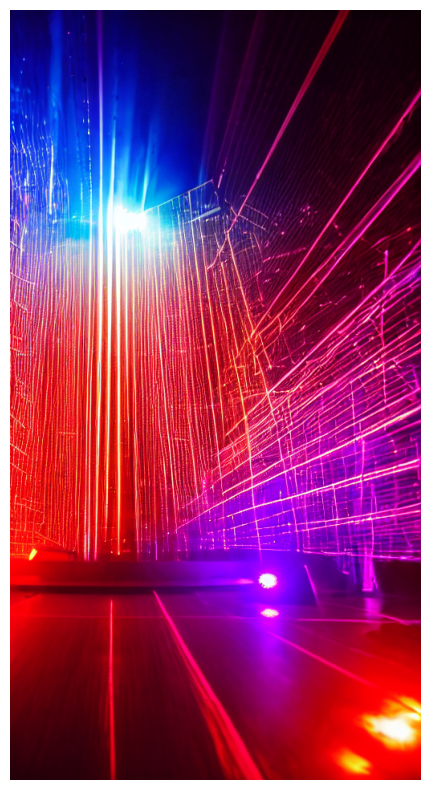

In [ ]:
image = generate_single_image(prompt_one_embeds, negative_prompt_embeds, height, width, num_inference_steps, generator, latents)
plot_images(image)

  0%|          | 0/60 [00:00<?, ?it/s]

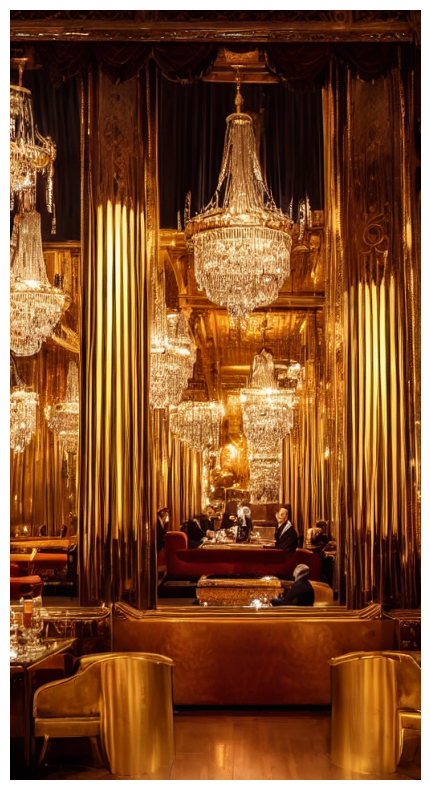

In [ ]:
image = generate_single_image(prompt_two_embeds, negative_prompt_embeds, height, width, num_inference_steps, generator, latents)
plot_images(image)

  0%|          | 0/60 [00:00<?, ?it/s]

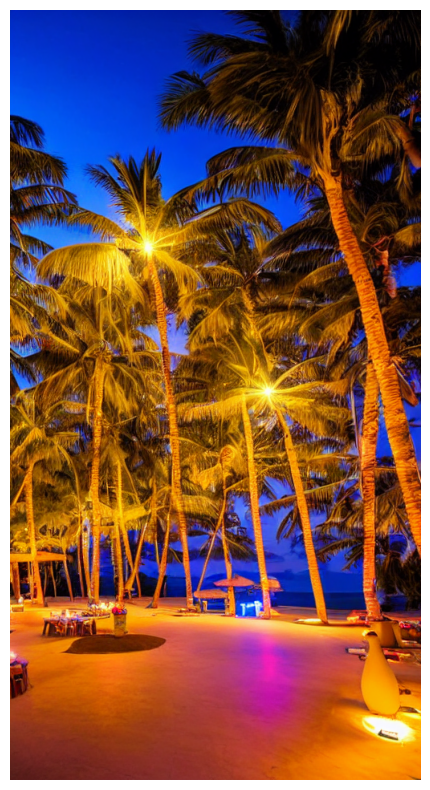

In [ ]:
image = generate_single_image(prompt_three_embeds, negative_prompt_embeds, height, width, num_inference_steps, generator, latents)
plot_images(image)

  0%|          | 0/60 [00:00<?, ?it/s]

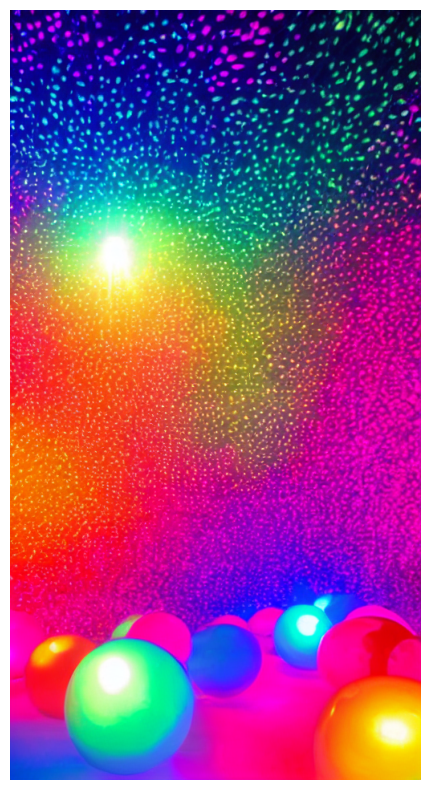

In [ ]:
image = generate_single_image(prompt_four_embeds, negative_prompt_embeds, height, width, num_inference_steps, generator, latents)
plot_images(image)

In [ ]:
def slerp(t, v0, v1, DOT_THRESHOLD=0.9995):
    v0 = v0.detach().cpu().numpy()
    v1 = v1.detach().cpu().numpy()

    #calculate dot product of vectors
    dot = np.sum(v0 * v1 / (np.linalg.norm(v0) * np.linalg.norm(v1)))
    #if transformation would not be meaningful, do linear interpolation
    if np.abs(dot) > DOT_THRESHOLD:
        v2 = (1 - t) * v0 + t * v1
    # otherwise, spheical interpolate
    else:
        theta_0 = np.arccos(dot)
        sin_theta_0 = np.sin(theta_0)
        theta_t = theta_0 * t
        sin_theta_t = np.sin(theta_t)
        s0 = np.sin(theta_0 - theta_t) / sin_theta_0
        s1 = sin_theta_t / sin_theta_0
        v2 = s0 * v0 + s1 * v1

        v2 = torch.tensor(v2)

    return v2


In [ ]:
# The higher you set this value, the smoother the interpolations will be. However, the generation time will increase. This value was chosen empirically.
num_interpolation_steps = 256

interpolation_list = []
for _, t in enumerate(np.linspace(0, 1, num_interpolation_steps)):
    interpolation_list.append(slerp(float(t), prompt_one_embeds, prompt_two_embeds))
for _, t in enumerate(np.linspace(0, 1, num_interpolation_steps)):
    interpolation_list.append(slerp(float(t), prompt_two_embeds, prompt_three_embeds))
for _, t in enumerate(np.linspace(0, 1, num_interpolation_steps)):
    interpolation_list.append(slerp(float(t), prompt_three_embeds, prompt_four_embeds))
for _, t in enumerate(np.linspace(0, 1, num_interpolation_steps)):
    interpolation_list.append(slerp(float(t), prompt_four_embeds, prompt_one_embeds))

In [ ]:
images = []
# Disable image generation progress bar, we'll display our own
pipe.set_progress_bar_config(disable=True)
print(range(len(interpolation_list)))
for batch in tqdm(range(len(interpolation_list))):
  images.append(pipe(
                height=height,
                width=width,
                num_images_per_prompt=1,
                prompt_embeds=interpolation_list[batch],
                negative_prompt_embeds=negative_prompt_embeds,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
                generator=generator,
                latents=latents,
                     ).images

  )

range(0, 1024)


  0%|          | 0/1024 [00:00<?, ?it/s]

In [3]:
def glob_save_images(base_directory, image_library, image_counter):
  file_count = len(image_library)
  globbed_dir_num = int((file_count/100)+1)
  glob_file = 0
  for flc in range(0, globbed_dir_num):
      os.makedirs(base_directory + "%05d" % (flc+1), exist_ok=True)
  for idx in tqdm(range(len(image_library))):
    if idx  >= 0 and idx <= 100:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05s.png" % ((glob_file+1), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 101 and idx <= 200:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+2), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 201 and idx <= 300:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+3),( image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 301 and idx <= 400:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+4), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 401 and idx <= 500:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+5), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 501 and idx <= 600:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+6), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 601 and idx <= 700:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+7), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 701 and idx <= 800:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+8), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 801 and idx <= 900:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+9), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 901 and idx <= 1000:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+10), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1
    if idx >= 1001 and idx <= 1100:
         plt.figure(figsize=(10,10))
         plt.imshow(image_library[idx][0])
         plt.axis('off')
         filename = base_directory + "%05d/generated_plot_%05d.png" % ((glob_file+11), (image_counter+1))
         plt.savefig(filename, transparent=True,bbox_inches="tight",pad_inches=0.0 )
         plt.close()
         image_counter += 1


In [ ]:
counter = 0
base_directory = '/content/gdrive/My Drive/stable_diffusion/'
glob_save_images(base_directory, images, counter)

  0%|          | 0/1024 [00:00<?, ?it/s]

In [4]:
import os
import cv2

In [ ]:
image_base_folder = '/content/gdrive/My Drive/stable_diffusion/' # make sure to use your folder
file_count = len(os.listdir(image_base_folder))
print(file_count)

video_name = 'test_thousands.avi'
os.chdir("/content/gdrive/My Drive/stable_diffusion_outputs/")

image_locations = []
for dir in range(1, file_count+1):
  for image in os.listdir(image_base_folder + "%05d/" % (dir)):
    if image.endswith(".jpg") or image.endswith(".jpeg") or image.endswith("png"):
      image_locations.append(image_base_folder + "%05d/" % (dir) + image)

images = [img for img in image_locations
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
frame = cv2.imread(images[0])

height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(video_name, fourcc, 34,(width, height))

for image in images:
    video.write(cv2.imread(image))

video.release()

cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np
video_path = "/content/gdrive/My Drive/stable_diffusion_outputs/test_thousands.avi"
cap = cv2.VideoCapture(video_path)
ret = True
frames = []
while ret:
    ret, img = cap.read()
    if ret:
      recolored_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      frames.append(recolored_img)

video = np.stack(frames, axis=0)

import gc
from super_image import EdsrModel, ImageLoader
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)

images_upscaled = []
with torch.no_grad():
  for frame in tqdm(range(len(video))):
    frame_float = video[frame].astype(np.float32)
    image_tensor = torch.from_numpy(frame_float)
    image_tensor = image_tensor.permute(2, 0, 1)
    upscale_image = model(image_tensor)
    upscale_image = upscale_image.permute(1, 2, 0)
    upscale_image = upscale_image.cpu().numpy()
    upscale_image = cv2.cvtColor(upscale_image, cv2.COLOR_RGB2BGR)
    images_upscaled.append(upscale_image)
    del upscale_image
    del image_tensor
    del frame_float
    gc.collect()
    torch.cuda.empty_cache()

counter = 0
base_directory = '/content/gdrive/My Drive/upscaled_images/'
glob_save_images(base_directory, images_upscaled, counter)

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

In [7]:
del images_upscaled
gc.collect()
torch.cuda.empty_cache()

In [ ]:
image_base_folder = '/content/gdrive/My Drive/upscaled_images/' # make sure to use your folder
file_count = len(os.listdir(image_base_folder))
print(file_count)

video_name = 'test_thousands_upscaled.avi'
os.chdir("/content/gdrive/My Drive/stable_diffusion_outputs/")

image_locations = []
for dir in range(1, file_count+1):
  for image in os.listdir(image_base_folder + "%05d/" % (dir)):
    if image.endswith(".jpg") or image.endswith(".jpeg") or image.endswith("png"):
      image_locations.append(image_base_folder + "%05d/" % (dir) + image)

images = [img for img in image_locations
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]

# Array images should only consider
# the image files ignoring others if any
#   print(images)

frame = cv2.imread(images[0])

#     # setting the frame width, height width
#     # the width, height of first image
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(video_name, fourcc, 34,(width, height))

#     # Appending the images to the video one by one
for image in images:
    video.write(cv2.imread(image))

video.release()  # releasing the video generated

# Deallocating memories taken for window creation
cv2.destroyAllWindows()

In [ ]:
import glob
    # my all files starts with "frame" and ends with ".jpg"
fileList = glob.glob('/content/gdrive/My Drive/stable_diffusion/*/*')
print("Number of files removed ",len(fileList))

for filePath in fileList:
    os.remove(filePath)

In [ ]:
from google.colab import runtime
runtime.unassign()
